# MAIN CODE

# Workings

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta, date
import pandas as pd
from matplotlib import pyplot as plt

Trying out for 1 stock and 1 date range first

In [ ]:
ticker = "SPY"
startDate = "2021-09-15"
endDate = "2022-01-13"

In [ ]:
def convert_date_to_correct_format(date):
    dateofint = datetime.strptime(date, '%Y-%m-%d')
    print(f"Date = {dateofint}")
    print(f"Weekday Number: {dateofint.weekday()}")
    if(dateofint.weekday() > 4):
        print(f"Is a Weekdend")
#         dateofint = dateofint - timedelta(days=2)
    return dateofint

In [ ]:
startDate = convert_date_to_correct_format(startDate)
endDate = convert_date_to_correct_format(endDate)

In [ ]:
tickerObject = yf.Ticker(ticker)
data = tickerObject.history(start=startDate, end=endDate)

In [ ]:
data

In [ ]:
closePricesDf = data['Close']
closePricesDf.name = ticker
closePricesDf

In [ ]:
print(list(data.index)[1])
print(pd.Timestamp(2021, 10, 5))

In [ ]:
print(startDate)
print(endDate)
pd.date_range(start=startDate, end=endDate)

In [ ]:
# # Covered below
# dd = pd.Timestamp(2022, 1, 15)
# holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=dd))
# holdingUpdateDf = pd.merge(holdingUpdateDf, closePricesDf, how = 'left', left_index=True, right_index=True)
# holdingUpdateDf.head(10)

In [ ]:
# # Covered below
# holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
# # holdingUpdateDf.head(10)

In [ ]:
ticker_column_name = ticker + " Holdings"
ticker_column_name

In [ ]:
holdings = pd.read_csv('holdings.csv', index_col='Date', parse_dates=True, dayfirst=True)
holdings = holdings.sort_index()

In [ ]:
# holdings = pd.read_csv('holdings.csv', index_col='Date', parse_dates=True, dayfirst=True)
holdings['cumulative'] = holdings[ticker_column_name].cumsum()
# aaplHoldings.drop(['AAPL Holdings'])
holdings.drop(columns=[ticker_column_name], inplace = True)
holdings

In [ ]:
# dd = pd.Timestamp(2022, 1, 15)
holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=endDate))
holdingUpdateDf = pd.merge(holdingUpdateDf, closePricesDf, how = 'left', left_index=True, right_index=True)
holdingUpdateDf.head(10)

holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")

holdingUpdateDf = pd.merge(holdingUpdateDf, holdings, how = 'left', left_index=True, right_index=True)
holdingUpdateDf['invested'] = holdingUpdateDf['cumulative'] * holdingUpdateDf[ticker]
holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
holdingUpdateDf = holdingUpdateDf.fillna(0)
holdingUpdateDf

In [ ]:
valueDf = holdingUpdateDf.copy()
valueDf['value'] = valueDf[ticker]*valueDf['cumulative']
valueDf

In [ ]:
title = f'{ticker}: Value of Holdings & Amount Invested'
valueDf['value'].plot(label = "value", figsize=(16,8), title = title)
valueDf['invested'].plot(label = "invested")

plt.legend()
plt.show()

# For multiple from holdings file

In [55]:
import yfinance as yf
from datetime import datetime, timedelta, date
import pandas as pd
from matplotlib import pyplot as plt

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In pseudocode, the different functions are:

```
Read in `holdings.csv`:
    Get the tickr
    Get (tickerHoldingDataFrame, startDate) from HandleAllocationDates()
For the tickr, get historical data from startDate to today.
Extract closing prices out of the data
Create empty dataframe from startDate to today
Merge closingPrices and forward fill for weekends
Create 'invested' column
Merge holdingData and forward fill for all days
Fillna with 0
Create value column in mainDF
Plot value and total invested


def HandleAllocationDates():
    Create df for ticker allocations
    Sort index
    Cumsum holdings
    return df, firstDate
```


In [63]:
# Holdings in a dataframe
holdings = pd.read_csv('sampleholdings.csv', index_col='Date', parse_dates=True, dayfirst=True)
holdings = holdings.sort_index()
# holdings = holdings.fillna(0)
holdings

,QQQM,AGC220121C00015000,ETH-USD
Date,,,
2021-06-14,NaN,NaN,1.0
2021-07-01,NaN,1.0,NaN
2021-07-10,NaN,NaN,NaN
2021-08-16,NaN,NaN,1.0
2021-08-19,NaN,NaN,NaN
2021-09-15,NaN,-1.0,NaN
2021-09-20,5.0,NaN,NaN
2021-09-29,NaN,NaN,-2.0
2021-10-15,5.0,NaN,NaN


In [64]:
tickers = list(holdings.columns)
startDate = holdings.index[0]
endDate = date.today()
print(startDate, endDate)
tickers

2021-06-14 00:00:00 2022-01-16


['QQQM', 'AGC220121C00015000', 'ETH-USD']

In [65]:
holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=endDate))

In [66]:
holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=endDate))

for ticker in tickers:
    print(ticker)
    
    newDf = pd.DataFrame(holdings[ticker])
    newDf = newDf.rename(columns = {ticker:f'units bought of {ticker}'})
    newDf[f'cumulative {ticker}'] = newDf[f'units bought of {ticker}'].cumsum()
    newDf.dropna(inplace = True)
#     newDf = newDf[newDf[f'cumulative {ticker}'] != 0] #I had put this for a reason but it results in ignoring investment value when my holdings become zero i.e. i close my position
    print('newdf\n',newDf)
    
    # Get yfinance data
    tickerObject = yf.Ticker(ticker)
    data = tickerObject.history(start=startDate, end=endDate)
    closePricesDf = data['Close']
    closePricesDf.name = ticker
#     print(closePricesDf)
    
    holdingUpdateDf = pd.merge(holdingUpdateDf, closePricesDf, how = 'left', left_index=True, right_index=True)
    holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
    
    holdingUpdateDf = pd.merge(holdingUpdateDf, newDf, how = 'left', left_index=True, right_index=True)
    holdingUpdateDf[f'cost of {ticker}'] = holdingUpdateDf[ticker] * holdingUpdateDf[f'units bought of {ticker}']
    holdingUpdateDf[f'total cost of {ticker}'] = holdingUpdateDf[f'cost of {ticker}'].cumsum()
    holdingUpdateDf[[f'units bought of {ticker}']] = holdingUpdateDf[[f'units bought of {ticker}']].fillna(value=0)
    holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
    holdingUpdateDf = holdingUpdateDf.fillna(value = 0)
    
    holdingUpdateDf[f'value of {ticker}'] = holdingUpdateDf[ticker] * holdingUpdateDf[f'cumulative {ticker}']
    
holdingUpdateDf    

QQQM
newdf
             units bought of QQQM  cumulative QQQM
Date                                             
2021-09-20                   5.0              5.0
2021-10-15                   5.0             10.0
2021-11-15                   5.0             15.0
2021-12-15                   5.0             20.0
2022-01-14                   5.0             25.0
AGC220121C00015000
newdf
             units bought of AGC220121C00015000  cumulative AGC220121C00015000
Date                                                                         
2021-07-01                                 1.0                            1.0
2021-09-15                                -1.0                            0.0
ETH-USD
newdf
             units bought of ETH-USD  cumulative ETH-USD
Date                                                   
2021-06-14                      1.0                 1.0
2021-08-16                      1.0                 2.0
2021-09-29                     -2.0                 0.0
2021-

,QQQM,units bought of QQQM,cumulative QQQM,cost of QQQM,total cost of QQQM,value of QQQM,AGC220121C00015000,units bought of AGC220121C00015000,cumulative AGC220121C00015000,cost of AGC220121C00015000,total cost of AGC220121C00015000,value of AGC220121C00015000,ETH-USD,units bought of ETH-USD,cumulative ETH-USD,cost of ETH-USD,total cost of ETH-USD,value of ETH-USD
2021-06-14,141.034500,0.0,0.0,0.000000,0.000000,0.000000,1.00,0.0,0.0,0.0,0.00,0.0,2537.891113,1.0,1.0,2537.891113,2537.891113,2537.891113
2021-06-15,140.264069,0.0,0.0,0.000000,0.000000,0.000000,1.00,0.0,0.0,0.0,0.00,0.0,2610.936768,0.0,1.0,2537.891113,2537.891113,2610.936768
2021-06-16,139.705917,0.0,0.0,0.000000,0.000000,0.000000,1.10,0.0,0.0,0.0,0.00,0.0,2367.663574,0.0,1.0,2537.891113,2537.891113,2367.663574
2021-06-17,141.470047,0.0,0.0,0.000000,0.000000,0.000000,1.10,0.0,0.0,0.0,0.00,0.0,2372.001953,0.0,1.0,2537.891113,2537.891113,2372.001953
2021-06-18,140.323853,0.0,0.0,0.000000,0.000000,0.000000,1.10,0.0,0.0,0.0,0.00,0.0,2231.733154,0.0,1.0,2537.891113,2537.891113,2231.733154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,159.360001,0.0,20.0,814.832001,3133.946304,3187.200012,0.55,0.0,0.0,-0.4,0.51,0.0,3372.258301,0.0,2.0,4557.503906,9166.172607,6744.516602
2022-01-13,155.470001,0.0,20.0,814.832001,3133.946304,3109.400024,0.55,0.0,0.0,-0.4,0.51,0.0,3248.288574,0.0,2.0,4557.503906,9166.172607,6496.577148
2022-01-14,156.279999,5.0,25.0,781.399994,3915.346298,3906.999969,0.55,0.0,0.0,-0.4,0.51,0.0,3310.001465,0.0,2.0,4557.503906,9166.172607,6620.002930
2022-01-15,156.279999,0.0,25.0,781.399994,3915.346298,3906.999969,0.55,0.0,0.0,-0.4,0.51,0.0,3330.530762,0.0,2.0,4557.503906,9166.172607,6661.061523


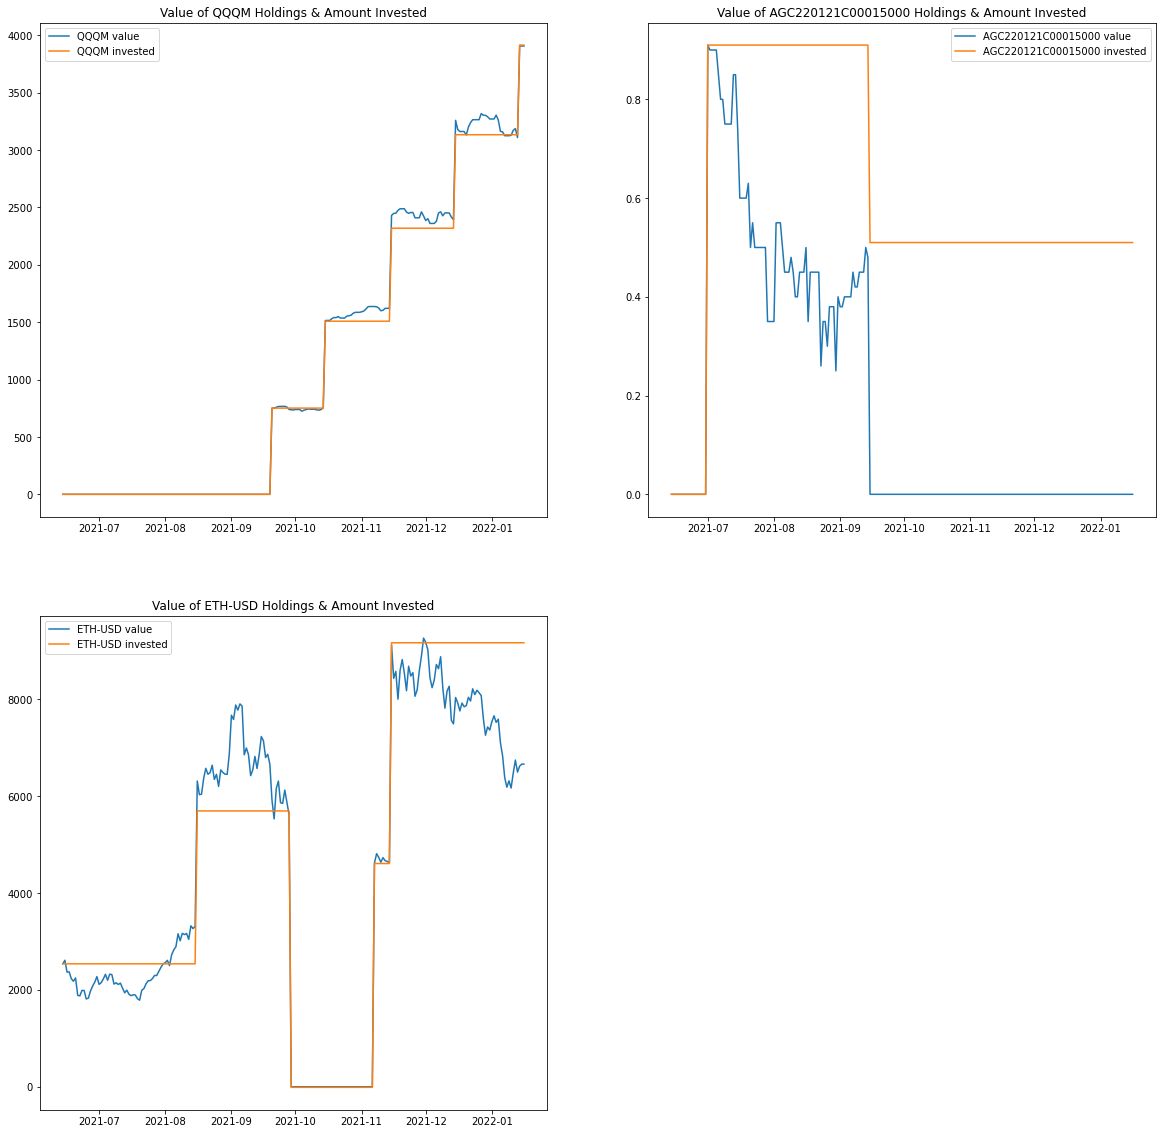

In [67]:
Tot = len(tickers)
Cols = 2

# Compute Rows required
Rows = Tot // Cols 
Rows += Tot % Cols

# Create a Position index
position = range(1,Tot + 1)

fig = plt.figure(1, figsize=(20,20))
for k in range(Tot):
    ticker = tickers[k]
    valLabel = f'{ticker} value'
    invLabel = f'{ticker} invested'
    ax = fig.add_subplot(Rows,Cols,position[k])
    ax.plot(holdingUpdateDf[f'value of {ticker}'], label=valLabel)      # Or whatever you want in the subplot
    ax.plot(holdingUpdateDf[f'total cost of {ticker}'], label=invLabel)
    ax.legend()
    title = f"Value of {ticker} Holdings & Amount Invested"
    plt.title(title)

# for ticker in tickers:
#     valLabel = f'{ticker} value'
#     invLabel = f'{ticker} invested'
#     holdingUpdateDf[f'value of {ticker}'].plot(label = valLabel, figsize = (16,8))
#     holdingUpdateDf[f'total cost of {ticker}'].plot(label = invLabel)


# plt.legend()
plt.show()

In [68]:
holdingUpdateDf['total invested'] = 0
holdingUpdateDf['total value'] = 0
for ticker in tickers:
    holdingUpdateDf['total invested'] += holdingUpdateDf[f'total cost of {ticker}']
    holdingUpdateDf['total value'] += holdingUpdateDf[f'value of {ticker}']
holdingUpdateDf

,QQQM,units bought of QQQM,cumulative QQQM,cost of QQQM,total cost of QQQM,value of QQQM,AGC220121C00015000,units bought of AGC220121C00015000,cumulative AGC220121C00015000,cost of AGC220121C00015000,total cost of AGC220121C00015000,value of AGC220121C00015000,ETH-USD,units bought of ETH-USD,cumulative ETH-USD,cost of ETH-USD,total cost of ETH-USD,value of ETH-USD,total invested,total value
2021-06-14,141.034500,0.0,0.0,0.000000,0.000000,0.000000,1.00,0.0,0.0,0.0,0.00,0.0,2537.891113,1.0,1.0,2537.891113,2537.891113,2537.891113,2537.891113,2537.891113
2021-06-15,140.264069,0.0,0.0,0.000000,0.000000,0.000000,1.00,0.0,0.0,0.0,0.00,0.0,2610.936768,0.0,1.0,2537.891113,2537.891113,2610.936768,2537.891113,2610.936768
2021-06-16,139.705917,0.0,0.0,0.000000,0.000000,0.000000,1.10,0.0,0.0,0.0,0.00,0.0,2367.663574,0.0,1.0,2537.891113,2537.891113,2367.663574,2537.891113,2367.663574
2021-06-17,141.470047,0.0,0.0,0.000000,0.000000,0.000000,1.10,0.0,0.0,0.0,0.00,0.0,2372.001953,0.0,1.0,2537.891113,2537.891113,2372.001953,2537.891113,2372.001953
2021-06-18,140.323853,0.0,0.0,0.000000,0.000000,0.000000,1.10,0.0,0.0,0.0,0.00,0.0,2231.733154,0.0,1.0,2537.891113,2537.891113,2231.733154,2537.891113,2231.733154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,159.360001,0.0,20.0,814.832001,3133.946304,3187.200012,0.55,0.0,0.0,-0.4,0.51,0.0,3372.258301,0.0,2.0,4557.503906,9166.172607,6744.516602,12300.628912,9931.716614
2022-01-13,155.470001,0.0,20.0,814.832001,3133.946304,3109.400024,0.55,0.0,0.0,-0.4,0.51,0.0,3248.288574,0.0,2.0,4557.503906,9166.172607,6496.577148,12300.628912,9605.977173
2022-01-14,156.279999,5.0,25.0,781.399994,3915.346298,3906.999969,0.55,0.0,0.0,-0.4,0.51,0.0,3310.001465,0.0,2.0,4557.503906,9166.172607,6620.002930,13082.028906,10527.002899
2022-01-15,156.279999,0.0,25.0,781.399994,3915.346298,3906.999969,0.55,0.0,0.0,-0.4,0.51,0.0,3330.530762,0.0,2.0,4557.503906,9166.172607,6661.061523,13082.028906,10568.061493


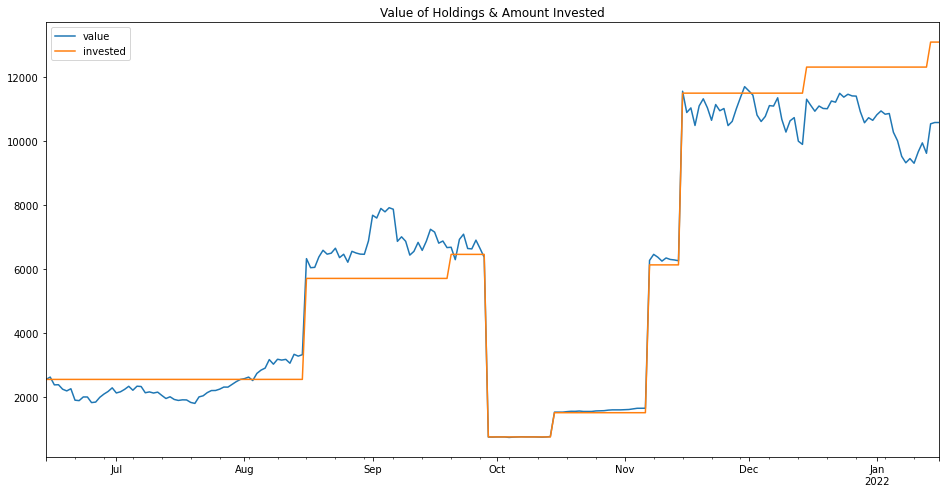

In [69]:
title = 'Value of Holdings & Amount Invested'
holdingUpdateDf['total value'].plot(label = "value", figsize=(16,8), title = title)
holdingUpdateDf['total invested'].plot(label = "invested")

plt.legend()
plt.show()

holdingUpdateDf.to_csv("holdings_updated.csv")